# Лабораторна робота №4

## Структури для роботи з великими обсягами даних в Python

In [2]:
import pandas as pd
import numpy as np
import time

results = []

### Відкриття файлу

#### Pandas

In [3]:
def download_data_pd(file_path):
    data_pd = pd.read_csv(
        file_path,
        sep=';',
        na_values='?',
        low_memory=False
    )
    
    data_pd.dropna(inplace=True)
    
    data_pd['Date'] = pd.to_datetime(data_pd['Date'], format='%d/%m/%Y', errors='coerce')
    
    return data_pd

start_time = time.time()
data_pd = download_data_pd('household_power_consumption.txt')
time_pd = time.time() - start_time
results.append(('Pandas', 'download_data', time_pd, 5))

data_pd.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


#### Numpy

In [4]:
def download_data_np(file_path):
    data_np = np.genfromtxt(
        file_path,
        delimiter=';',
        skip_header=1,
        missing_values="?",
        filling_values=np.nan,
        dtype=None,
        encoding='utf-8'
    )
    return data_np

start_time = time.time()    
data_np = download_data_np('household_power_consumption.txt')
time_pd = time.time() - start_time
results.append(('Numpy', 'download_data', time_pd, 1))

print(data_np)

[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]


### 1. Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт

#### Pandas

In [5]:
def active_power_pd(data_pd):
    filtered_data_pd = data_pd[data_pd['Global_active_power'] > 5]
    return filtered_data_pd

start_time = time.time() 
filtered_data_pd = active_power_pd(data_pd)
time_pd = time.time() - start_time
results.append(('Pandas', 'active_power', time_pd, 5))

filtered_data_pd.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0


#### Numpy

In [6]:
def active_power_np(data_np):
    filtered_data_np = data_np[data_np['f2'] > 5.0]
    return filtered_data_np

start_time = time.time() 
filtered_data_np = active_power_np(data_np)
time_pd = time.time() - start_time
results.append(('Numpy', 'active_power', time_pd, 4))

print(filtered_data_np)

[('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.) ...
 ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.)
 ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.)
 ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)]


### 2. Обрати всі записи, у яких вольтаж перевищую 235 В

#### Pandas

In [7]:
def voltage_pd(data_pd):
    filtered_data_pd = data_pd[data_pd['Voltage'] > 235]
    return filtered_data_pd

start_time = time.time() 
filtered_data_pd = voltage_pd(data_pd)
time_pd = time.time() - start_time
results.append(('Pandas', 'voltage', time_pd, 5))

filtered_data_pd.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0


#### Numpy

In [8]:
def voltage_np(data_np):    
    filtered_data_np = data_np[data_np['f4'] > 235]
    return filtered_data_np

start_time = time.time() 
filtered_data_np = voltage_np(data_np)
time_pd = time.time() - start_time
results.append(('Numpy', 'voltage', time_pd, 4))

print(filtered_data_np)

[('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.)
 ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]


### 3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер

#### Pandas

In [9]:
def intensity_sub_metering_pd(data_pd):
    filtered_data_pd = data_pd[(data_pd['Global_intensity'] >= 19) & (data_pd['Global_intensity'] <= 20)]
    result = filtered_data_pd[filtered_data_pd['Sub_metering_2'] > filtered_data_pd['Sub_metering_3']]
    return result

start_time = time.time() 
result = intensity_sub_metering_pd(data_pd)
time_pd = time.time() - start_time
results.append(('Pandas', 'intensity_sub_metering', time_pd, 5))

result.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0


#### Numpy

In [10]:
def intensity_sub_metering_np(data_np):
    filtered_data_np = data_np[(data_np['f5'] >= 19) & (data_np['f5'] <= 20)]
    result = filtered_data_np[filtered_data_np['f7'] > filtered_data_np['f8']]
    return result

start_time = time.time() 
result = intensity_sub_metering_np(data_np)
time_pd = time.time() - start_time
results.append(('Numpy', 'intensity_sub_metering', time_pd, 2))

print(result)

[('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.)
 ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.)
 ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.) ...
 ('24/11/2010', '07:55:00', 4.602, 0.   , 237.08, 19.4, 0., 40., 17.)
 ('24/11/2010', '07:56:00', 4.536, 0.   , 237.03, 19. , 0., 39., 17.)
 ('24/11/2010', '07:57:00', 4.626, 0.   , 236.78, 19.4, 0., 39., 17.)]


### 4. Обрати випадковим чином 500000 записів (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії

#### Pandas

In [11]:
def mean_values_pd(data_pd):
    random_sample = data_pd.sample(n=500000, random_state=42)
    
    mean_values = random_sample[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return mean_values

start_time = time.time() 
mean_values = mean_values_pd(data_pd)
time_pd = time.time() - start_time
results.append(('Pandas', 'mean_values', time_pd, 5))

print(mean_values)

Sub_metering_1    1.119258
Sub_metering_2    1.308912
Sub_metering_3    6.452950
dtype: float64


#### Numpy

In [12]:
def mean_values_pd(data_np):
    random_indices = np.random.choice(len(data_np), size=500000, replace=False)
    sampled_data = data_np[random_indices]
    
    # Обчислення середніх величин для трьох груп споживання
    average_sub_metering_1 = np.nanmean(sampled_data['f6'])  # Sub_metering_1
    average_sub_metering_2 = np.nanmean(sampled_data['f7'])  # Sub_metering_2
    average_sub_metering_3 = np.nanmean(sampled_data['f8'])  # Sub_metering_3
    return average_sub_metering_1, average_sub_metering_2, average_sub_metering_3

start_time = time.time()
average_sub_metering_1, average_sub_metering_2, average_sub_metering_3 = mean_values_pd(data_np)
time_pd = time.time() - start_time
results.append(('Numpy', 'mean_values', time_pd, 4))

print("Sub_metering_1:", average_sub_metering_1)
print("Sub_metering_2:", average_sub_metering_2)
print("Sub_metering_3:", average_sub_metering_3)

Sub_metering_1: 1.1212318847918334
Sub_metering_2: 1.295802234082416
Sub_metering_3: 6.471034908803662


### 5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини

#### Pandas

In [13]:
def data_after_6pm_pd(data_pd):
    data_pd['Time'] = pd.to_datetime(data_pd['Time'], format='%H:%M:%S', errors='coerce').dt.time
    
    # Фільтрація записів після 18:00 з потужністю > 6 кВт
    data_pd_after_6pm = data_pd[
            (pd.to_datetime(data_pd['Time'], format='%H:%M:%S').dt.hour >= 18) &
            (data_pd['Global_active_power'] > 6)]
    
    # Вибір записів, де Sub_metering_2 є найбільшим споживачем
    data_pd_sub_metering_2 = data_pd_after_6pm[
        data_pd_after_6pm['Sub_metering_2'] > data_pd_after_6pm[['Sub_metering_1', 'Sub_metering_3']].max(axis=1)
    ]
    
    # Розділяємо дані на половини
    half = len(data_pd_sub_metering_2) // 2
    first_half = data_pd_sub_metering_2.iloc[:half]
    second_half = data_pd_sub_metering_2.iloc[half:]
    
    # Вибираємо кожен 3-й запис з першої половини та кожен 4-й з другої половини
    selected_first_half = first_half.iloc[::3]
    selected_second_half = second_half.iloc[::4]
    
    final_result = pd.concat([selected_first_half, selected_second_half])
    return final_result

start_time = time.time() 
final_result = data_after_6pm_pd(data_pd)
time_pd = time.time() - start_time
results.append(('Pandas', 'data_after_6pm', time_pd, 1))

final_result.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
41,2006-12-16,18:05:00,6.052,0.192,232.93,26.2,0.0,37.0,17.0
44,2006-12-16,18:08:00,6.308,0.116,232.25,27.0,0.0,36.0,17.0
17494,2006-12-28,20:58:00,6.386,0.374,236.63,27.0,1.0,36.0,17.0
17498,2006-12-28,21:02:00,8.088,0.262,235.50,34.4,1.0,72.0,17.0
17501,2006-12-28,21:05:00,7.230,0.152,235.22,30.6,1.0,73.0,17.0
17504,2006-12-28,21:08:00,7.352,0.000,235.45,31.2,1.0,73.0,17.0
17507,2006-12-28,21:11:00,9.048,0.000,231.48,39.0,34.0,71.0,16.0
17510,2006-12-28,21:14:00,9.118,0.108,231.18,39.4,36.0,72.0,16.0
17513,2006-12-28,21:17:00,7.040,0.130,233.27,30.2,37.0,38.0,17.0
18952,2006-12-29,21:16:00,6.146,0.116,230.53,26.6,0.0,70.0,0.0


#### Numpy

In [14]:
def data_after_6pm_np(data_np):
    after_6pm = np.array([int(time.split(':')[0]) >= 18 for time in data_np['f1']])
    data_np_after_6pm = data_np[after_6pm]
    
    data_np_after_6pm = data_np_after_6pm[data_np_after_6pm['f2'] > 6.0]
    
    data_np_after_6pm = data_np_after_6pm[
        (data_np_after_6pm['f7'] > data_np_after_6pm['f6']) &
        (data_np_after_6pm['f7'] > data_np_after_6pm['f8']) 
    ]
    
    mid_index = len(data_np_after_6pm) // 2
    first_half = data_np_after_6pm[:mid_index]
    second_half = data_np_after_6pm[mid_index:]
    
    selected_first_half = first_half[::3]
    selected_second_half = second_half[::4]
    
    final_result = np.concatenate((selected_first_half, selected_second_half))
    return final_result

start_time = time.time() 
final_result = data_after_6pm_np(data_np)
time_pd = time.time() - start_time
results.append(('Numpy', 'data_after_6pm', time_pd, 5))

print(final_result)

[('16/12/2006', '18:05:00',  6.052, 0.192, 232.93, 26.2,  0., 37., 17.)
 ('16/12/2006', '18:08:00',  6.308, 0.116, 232.25, 27. ,  0., 36., 17.)
 ('28/12/2006', '20:58:00',  6.386, 0.374, 236.63, 27. ,  1., 36., 17.)
 ('28/12/2006', '21:02:00',  8.088, 0.262, 235.5 , 34.4,  1., 72., 17.)
 ('28/12/2006', '21:05:00',  7.23 , 0.152, 235.22, 30.6,  1., 73., 17.)
 ('28/12/2006', '21:08:00',  7.352, 0.   , 235.45, 31.2,  1., 73., 17.)
 ('28/12/2006', '21:11:00',  9.048, 0.   , 231.48, 39. , 34., 71., 16.)
 ('28/12/2006', '21:14:00',  9.118, 0.108, 231.18, 39.4, 36., 72., 16.)
 ('28/12/2006', '21:17:00',  7.04 , 0.13 , 233.27, 30.2, 37., 38., 17.)
 ('29/12/2006', '21:16:00',  6.146, 0.116, 230.53, 26.6,  0., 70.,  0.)
 ('29/12/2006', '21:19:00',  6.184, 0.138, 231.57, 26.6,  0., 70.,  0.)
 ('29/12/2006', '21:22:00',  6.214, 0.12 , 230.53, 26.8,  0., 70.,  0.)
 ('29/12/2006', '21:25:00',  6.086, 0.   , 229.04, 26.6,  0., 69.,  0.)
 ('29/12/2006', '21:29:00',  6.66 , 0.   , 229.  , 29. ,  0., 69

### Оцінка часу

In [15]:
scores = pd.DataFrame(results, columns=["Library", "Operation", "Time (seconds)", "Score"])

scores

,Library,Operation,Time (seconds),Score
0,Pandas,download_data,1.834771,5
1,Numpy,download_data,15.144519,1
2,Pandas,active_power,0.006484,5
3,Numpy,active_power,0.022110,4
4,Pandas,voltage,0.085493,5
5,Numpy,voltage,0.168672,4
6,Pandas,intensity_sub_metering,0.010062,5
7,Numpy,intensity_sub_metering,0.048595,2
8,Pandas,mean_values,0.221991,5
9,Numpy,mean_values,0.285951,4


### Додаткове завдання

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Linear Regression MSE: 0.9412274543304306


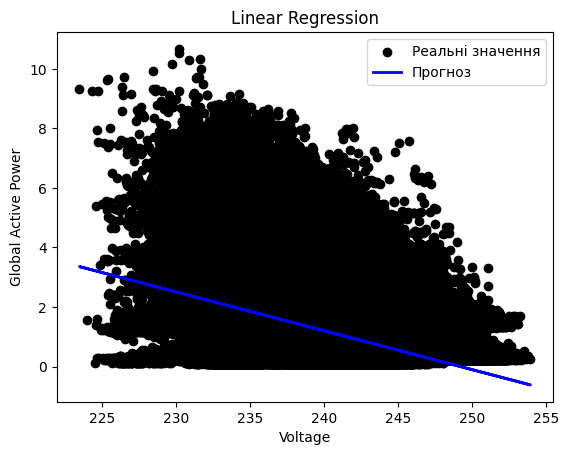

Ridge Regression MSE: 0.9412274542813049


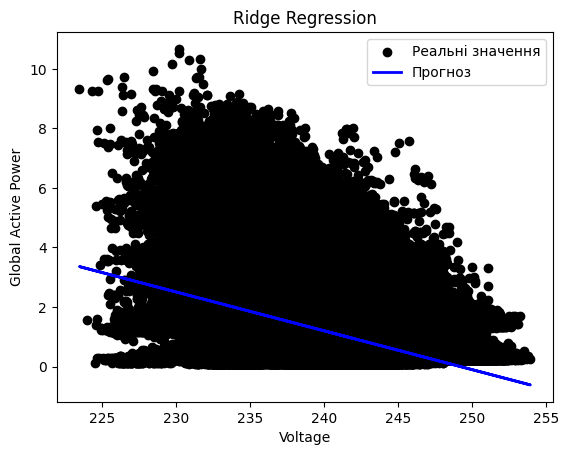

Lasso Regression MSE: 0.9421449524186715


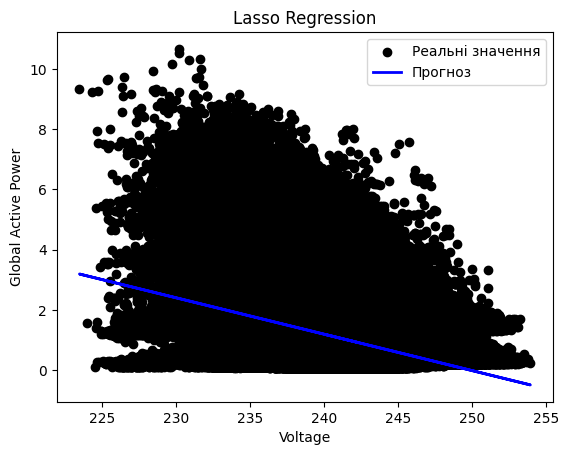

Best Model: Ridge Regression


In [34]:
X = data_pd[["Voltage"]].values  # Ознака для прогнозування
y = data_pd["Global_active_power"].values  # Цільова змінна

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": linear_model.Ridge(alpha=1.0),
    "Lasso Regression": linear_model.Lasso(alpha=0.1)
}
mse_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[model_name] = mse
    print(f"{model_name} MSE: {mse}")

    plt.scatter(X_test, y_test, color="black", label="Реальні значення")
    plt.plot(X_test, y_pred, color="blue", linewidth=2, label="Прогноз")
    plt.xlabel("Voltage")
    plt.ylabel("Global Active Power")
    plt.title(model_name)
    plt.legend()
    plt.show()

print("Best Model:", min(mse_results, key=mse_results.get))